# 00. Contents

01. Importing Libraries
02. Importing Data
03. PPI Consideration
04. Creating a Regional Column
05. Determining Spending by Region
06. Creating an Exclusion Flag
07. Marketing Strategies -
       Age Profile,
       Age Group Loyalty,
       Age Dependant Profile,
       Income Profile,
       Department Profile,
       Time Pattern Profile
08. Customer Profile Aggregation
09. Comparing Customer Profile with Region and Department
10. Export DF 

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 02. Importing Data

In [2]:
path = r'C:\Users\esteb\OneDrive\Desktop\2025_Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'instacart_dataset.pkl'))

# 03. Personally Identifiable Information (PII) Consideration

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'daily_frequency',
       'new_daily_frequency', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_item', 'spnd_itm_price_flag',
       'total_order_spend', 'order_spend_flag', 'customer_freq',
       'customer_freq_flag', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', 'full_name'],
      dtype='object')

The only potential source of personal identiafiable information I see is the customers full name.

# 04. Creating a Regional Column

In [5]:
# Missing values
df['state'].isnull().sum()

0

In [6]:
# Normalize states to make them uniform
df['state'] = df['state'].str.title().str.strip()

In [7]:
# Define region mappings
region_map = {
    # Region 1 (Northeast)
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',

    # Region 2 (Midwest)
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',

    # Region 3 (South)
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',

    # Region 4 (West)
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}

In [8]:
# Create new region column
df['region'] = df['state'].map(region_map)

# 05. Determining Spending By Region

In [9]:
# Spending Flag Count by region
pd.crosstab(df['region'], df['order_spend_flag'])

order_spend_flag,Higher Spender,Lower Spender
region,,
Midwest,6465276,1132049
Northeast,4876766,845970
South,8668525,1509665
West,7066952,1225961


Using the spend flag is a great starting point but I want to view the monetary value of what was actually spent to see if it makes a difference. I would asssume that more orders is in fact going to lead to a higher spending amount.

In [10]:
# Total Money spent by each region split up by spender flag
df.pivot_table(
    values='total_order_spend',
    index='region',
    columns='order_spend_flag',
    aggfunc='sum'
).style.format('${:,.2f}')


order_spend_flag,Higher Spender,Lower Spender
region,,
Midwest,"$889,597,542.50","$37,400,031.70"
Northeast,"$670,768,593.60","$27,871,855.30"
South,"$1,196,839,738.20","$49,791,550.90"
West,"$971,334,723.80","$40,414,713.30"


For both the Higher Spender and the Lower Spender flag most money is spent in the South, West, Midwest, and finally Northeast.

# 06. Creating an Exclusion Flag

In [11]:
# Create a flag column of customer activity based on max orders
df.loc[df['max_order'] < 5, 'customer_activity'] = 'LOW'
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'HIGH'

In [12]:
# Check dataframe row count
len(df)

32404859

In [13]:
# Count the frequency of customer activity
df['customer_activity'].value_counts()

customer_activity
HIGH    30964564
LOW      1440295
Name: count, dtype: int64

In [14]:
# Create dataframe of high activity customers per user_id
df_high_activity = df[df['customer_activity'] == 'HIGH']

In [15]:
# Count frequency of high activity
df_high_activity['customer_activity'].value_counts()

customer_activity
HIGH    30964564
Name: count, dtype: int64

#### Extra 

In [16]:
# Check how the new column might look per user_id
df.groupby('user_id')['customer_activity'].first().reset_index().head()

,user_id,customer_activity
0,1,HIGH
1,2,HIGH
2,3,HIGH
3,4,HIGH
4,5,LOW


In [17]:
# Count the frequency of customer activity grouped by user_id
df.groupby('user_id')['customer_activity'].first().value_counts()

customer_activity
HIGH    162631
LOW      43578
Name: count, dtype: int64

#### Export

In [18]:
# Export the filtered dataset to CSV
df_high_activity.to_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'instacart_high_activity_customers.pkl'))

# 07. Marketing Strategies

### Age Profile

In [19]:
# Create Age Group Profile
df.loc[df['age'] < 26, 'age_group_profile'] = 'Young Adult'
df.loc[(df['age'] >= 26) &(df['age'] < 65 ), 'age_group_profile'] = 'Adult'
df.loc[df['age'] >= 65, 'age_group_profile'] = 'Senior'

In [20]:
# Check new age group profile
df.groupby('user_id')['age_group_profile'].unique()

user_id
1               [Adult]
2              [Senior]
3               [Adult]
4               [Adult]
5              [Senior]
              ...      
206205          [Adult]
206206    [Young Adult]
206207         [Senior]
206208          [Adult]
206209         [Senior]
Name: age_group_profile, Length: 206209, dtype: object

In [21]:
# Count of user per age group
df.groupby('age_group_profile')['user_id'].nunique()

age_group_profile
Adult          125793
Senior          54729
Young Adult     25687
Name: user_id, dtype: int64

In [22]:
# Check columns by user id with no repeats
df.groupby('user_id').first().reset_index().head()

,user_id,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,n_dependants,fam_status,income,full_name,region,customer_activity,age_group_profile
0,1,2539329,1,2,8,15.0,196,1,0,Soda,...,Female,Alabama,31,3,married,40423,Linda Nguyen,South,HIGH,Adult
1,2,2168274,1,2,11,10.0,32792,1,0,Chipotle Beef & Pork Realstick,...,Female,Alaska,68,3,married,64940,Norma Chapman,West,HIGH,Senior
2,3,1374495,1,1,14,9.0,9387,1,0,Granny Smith Apples,...,Female,Arizona,33,3,married,93240,Janice Fry,West,HIGH,Adult
3,4,3343014,1,6,11,19.0,36606,1,0,Sprouted Multi-Grain Bread,...,Male,Arkansas,31,3,married,45435,Bobby Reed,South,HIGH,Adult
4,5,2717275,1,3,12,11.0,15349,1,0,Organic Raw Agave Nectar,...,Female,California,75,0,divorced/widowed,115242,Janet Lester,West,LOW,Senior


##### Pie Chart of Age Groups

In [23]:
# pandas Series for the diet profile count
age_group_profile_count = df.groupby('age_group_profile')['user_id'].nunique()

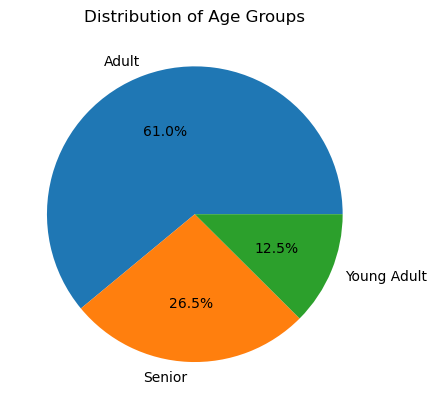

In [24]:
# Visualize a pie chart 
age_group_profile_pie_chart = age_group_profile_count.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
# Hide the y-label
plt.ylabel('')
plt.show()

### Age Group Loyalty

In [25]:
# Crosstab of Age Group Loyalty
crosstab_age_group_loyalty = pd.crosstab(
    df.groupby('user_id')[['loyalty_flag', 'age_group_profile']].first().reset_index()['loyalty_flag'],
    df.groupby('user_id')[['loyalty_flag', 'age_group_profile']].first().reset_index()['age_group_profile'],
    dropna=False)

In [26]:
# Check Crostab of Age Group Loyalty
print(crosstab_age_group_loyalty)

age_group_profile  Adult  Senior  Young Adult
loyalty_flag                                 
Loyal Customer     10361    4551         2105
New Customer       68617   29671        14040
Regular Customer   46815   20507         9542


##### Bar Chart of Age Group Loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal Customer'),
  Text(1, 0, 'New Customer'),
  Text(2, 0, 'Regular Customer')])

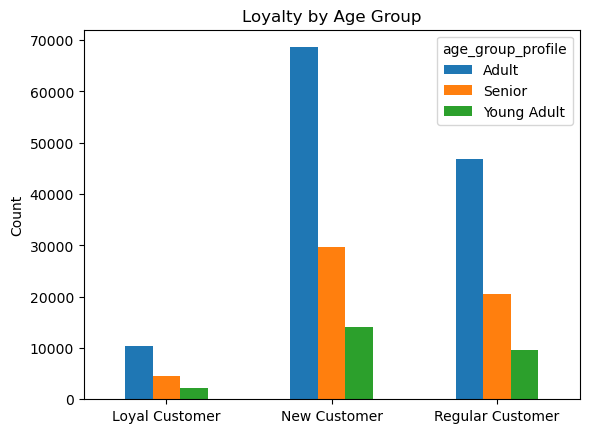

In [27]:
# Visualize a bar chart for the crosstab between loyalty_flag and Age Group
age_group_loyalty_bar_chart = crosstab_age_group_loyalty.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)

##### Export

In [28]:
age_group_profile_pie_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_group_profile_pie_chart.png'))

In [29]:
age_group_loyalty_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_group_loyalty_bar_chart.png'))

### Age and Depenants Profile

In [30]:
# Create a age and dependant column 
df.loc[(df['age'] <= 26) & (df['n_dependants'] == 0), 'age_dependant_profile'] = 'Young Adult'
df.loc[(df['age'] <= 26) & (df['n_dependants'] > 0), 'age_dependant_profile'] = 'Young Parent'
df.loc[(df['age'] > 26) & (df['age'] < 65) & (df['n_dependants'] == 0), 'age_dependant_profile'] = 'Adult'
df.loc[(df['age'] > 26) & (df['age'] < 65) & (df['n_dependants'] > 0), 'age_dependant_profile'] = 'Parent'
df.loc[(df['age'] >= 65) & (df['n_dependants'] == 0), 'age_dependant_profile'] = 'Senior'
df.loc[(df['age'] >= 65) & (df['n_dependants'] > 0), 'age_dependant_profile'] = 'Caregiver'


In [31]:
# Check new age dependant profile column per user
df.groupby('user_id')['age_dependant_profile'].unique()

user_id
1               [Parent]
2            [Caregiver]
3               [Parent]
4               [Parent]
5               [Senior]
               ...      
206205          [Parent]
206206    [Young Parent]
206207       [Caregiver]
206208          [Parent]
206209       [Caregiver]
Name: age_dependant_profile, Length: 206209, dtype: object

In [32]:
# Check columns by user id with no repeats
df.groupby('user_id').first().reset_index().head()

,user_id,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,n_dependants,fam_status,income,full_name,region,customer_activity,age_group_profile,age_dependant_profile
0,1,2539329,1,2,8,15.0,196,1,0,Soda,...,Alabama,31,3,married,40423,Linda Nguyen,South,HIGH,Adult,Parent
1,2,2168274,1,2,11,10.0,32792,1,0,Chipotle Beef & Pork Realstick,...,Alaska,68,3,married,64940,Norma Chapman,West,HIGH,Senior,Caregiver
2,3,1374495,1,1,14,9.0,9387,1,0,Granny Smith Apples,...,Arizona,33,3,married,93240,Janice Fry,West,HIGH,Adult,Parent
3,4,3343014,1,6,11,19.0,36606,1,0,Sprouted Multi-Grain Bread,...,Arkansas,31,3,married,45435,Bobby Reed,South,HIGH,Adult,Parent
4,5,2717275,1,3,12,11.0,15349,1,0,Organic Raw Agave Nectar,...,California,75,0,divorced/widowed,115242,Janet Lester,West,LOW,Senior,Senior


In [33]:
# Count unique users by age and dependent profile
df.groupby('age_dependant_profile')['user_id'].nunique()

age_dependant_profile
Adult           30669
Caregiver       41071
Parent          91847
Senior          13658
Young Adult      7275
Young Parent    21689
Name: user_id, dtype: int64

#### Age and Dependant Visualization

In [34]:
# Create age dependant profile count
profile_counts = df.groupby('user_id')['age_dependant_profile'].first().value_counts()

In [35]:
# Reorder Index
profile_order = [ 'Young Adult', 'Adult', 'Senior', '', 'Young Parent', 'Parent', 'Caregiver']
profile_counts = profile_counts.reindex(profile_order)

In [36]:
# Assign Colors
colors = ['blue', 'orange', 'green', 'white', 'blue', 'orange', 'green']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Young Adult'),
  Text(1, 0, 'Adult'),
  Text(2, 0, 'Senior'),
  Text(3, 0, ''),
  Text(4, 0, 'Young Parent'),
  Text(5, 0, 'Parent'),
  Text(6, 0, 'Caregiver')])

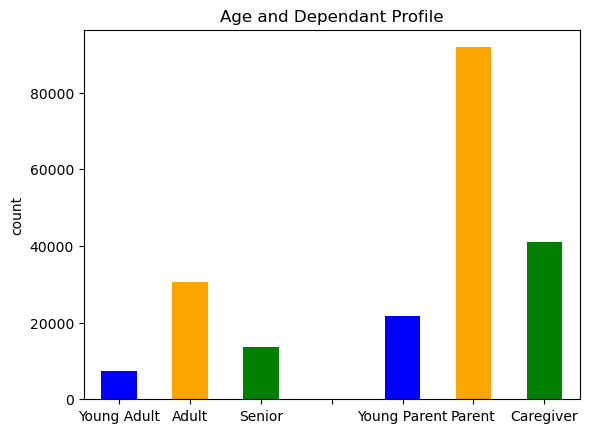

In [37]:
# Create Bar Chart based on each users age dependant profile
age_dependant_bar_chart = profile_counts.plot.bar(color = colors)
plt.title('Age and Dependant Profile')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

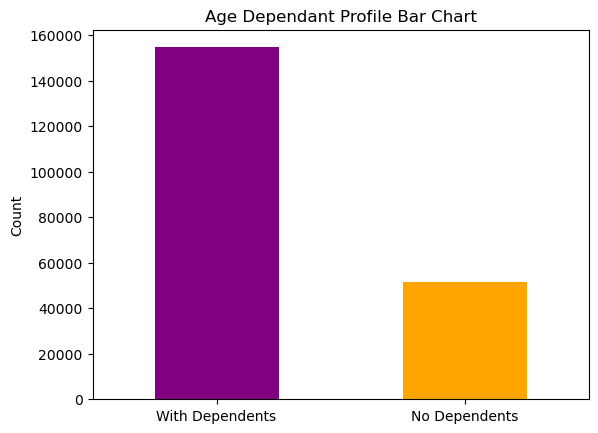

In [38]:
# Group profiles into With or No Dependents
df['dependant_group'] = df['age_dependant_profile'].map(lambda x: 'With Dependents' if x in ['Parent', 'Young Parent', 'Caregiver'] 
    else 'No Dependents')

# Count each user's group once
dependant_group_bar_chart = df.groupby('user_id')['dependant_group'].first().value_counts().plot.bar(color = ['purple', 'orange'])

plt.title('Age Dependant Profile Bar Chart')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


##### Export 

In [39]:
# Export Image of Bar Chart frequency of age_dependant_profile
age_dependant_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_dependant_bar_chart.png'))

In [40]:
dependant_group_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'dependant_group_bar_chart.png'))

### Income Profile

In [41]:
# Create income flag column
df.loc[(df['income'] <= 50000), 'income_profile'] = 'Low Income'
df.loc[(df['income'] > 50000) & (df['income'] <= 120000), 'income_profile'] = 'Regular Income'
df.loc[(df['income'] > 120000), 'income_profile'] = 'High Income'

In [42]:
# Check new income profile column
df.groupby('user_id')['income_profile'].unique()

user_id
1             [Low Income]
2         [Regular Income]
3         [Regular Income]
4             [Low Income]
5         [Regular Income]
                ...       
206205    [Regular Income]
206206    [Regular Income]
206207    [Regular Income]
206208       [High Income]
206209       [High Income]
Name: income_profile, Length: 206209, dtype: object

In [43]:
# Count of income profile groups
df.groupby('income_profile')['user_id'].nunique()

income_profile
High Income        56296
Low Income         34105
Regular Income    115808
Name: user_id, dtype: int64

In [44]:
# Check columns by user id with no repeats
df.groupby('user_id').first().reset_index().head()

,user_id,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,n_dependants,fam_status,income,full_name,region,customer_activity,age_group_profile,age_dependant_profile,dependant_group,income_profile
0,1,2539329,1,2,8,15.0,196,1,0,Soda,...,3,married,40423,Linda Nguyen,South,HIGH,Adult,Parent,With Dependents,Low Income
1,2,2168274,1,2,11,10.0,32792,1,0,Chipotle Beef & Pork Realstick,...,3,married,64940,Norma Chapman,West,HIGH,Senior,Caregiver,With Dependents,Regular Income
2,3,1374495,1,1,14,9.0,9387,1,0,Granny Smith Apples,...,3,married,93240,Janice Fry,West,HIGH,Adult,Parent,With Dependents,Regular Income
3,4,3343014,1,6,11,19.0,36606,1,0,Sprouted Multi-Grain Bread,...,3,married,45435,Bobby Reed,South,HIGH,Adult,Parent,With Dependents,Low Income
4,5,2717275,1,3,12,11.0,15349,1,0,Organic Raw Agave Nectar,...,0,divorced/widowed,115242,Janet Lester,West,LOW,Senior,Senior,No Dependents,Regular Income


#### Income Visualization

In [45]:
# Profile Counts
income_profile_counts = df.groupby('income_profile')['user_id'].nunique()

In [46]:
# Profile Order
desired_order = ['High Income', 'Regular Income', 'Low Income']
income_profile_counts = income_profile_counts.reindex(desired_order)

(array([0, 1, 2]),
 [Text(0, 0, 'High Income'),
  Text(1, 0, 'Regular Income'),
  Text(2, 0, 'Low Income')])

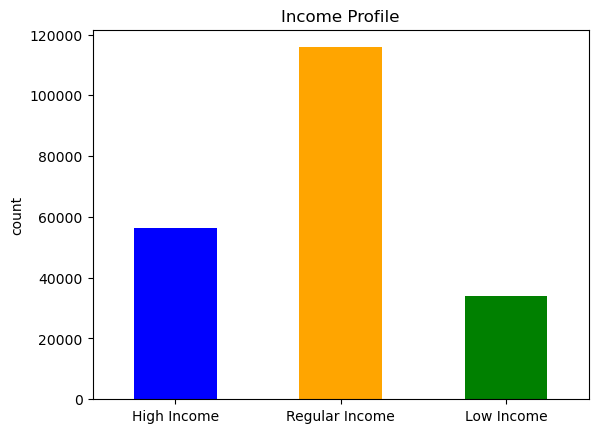

In [47]:
# Create bar chart showing the number of unique users in each income profile
income_profile_bar_chart = income_profile_counts.plot.bar(color = ['blue', 'orange', 'green'])
plt.title('Income Profile')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

##### Export 

In [48]:
# Export Image of Bar Chart frequency of income_profile
income_profile_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'income_profile_bar_chart.png'))

### Department Profile

In [49]:
# Group by customer_id and aggregate all departments into a list
df_user_dpt_list = df.groupby('user_id')['department_id'].apply(list).reset_index()

In [50]:
# Check List
df_user_dpt_list.head()

,user_id,department_id
0,1,"[7, 16, 19, 19, 17, 7, 19, 19, 4, 19, 14, 7, 1..."
1,2,"[19, 4, 20, 13, 19, 19, 19, 7, 20, 20, 4, 4, 4..."
2,3,"[4, 16, 4, 4, 16, 4, 4, 4, 19, 19, 16, 4, 19, ..."
3,4,"[3, 7, 1, 17, 5, 17, 15, 7, 3, 4, 1, 1, 4, 5, ..."
4,5,"[13, 6, 4, 4, 4, 4, 4, 4, 16, 4, 16, 16, 9, 16..."


In [51]:
# Initialize diet profile list
df_user_dpt_list['diet_profile'] = 'Meat Eater'

In [52]:
# Vegan = no meat (12), no dairy/eggs (16)
df_user_dpt_list.loc[df_user_dpt_list['department_id'].apply(lambda x: 12 not in x and 16 not in x), 'diet_profile'] = 'Vegan'

In [53]:
# Vegetarian = no meat (12), but not already Vegan
df_user_dpt_list.loc[(df_user_dpt_list['diet_profile'] != 'Vegan') 
    & df_user_dpt_list['department_id'].apply(lambda x: 12 not in x), 'diet_profile'] = 'Vegetarian'

In [54]:
# Merge back into the original df on user_id
df = df.merge(df_user_dpt_list[['user_id', 'diet_profile']], on = 'user_id', how = 'left')

In [55]:
# Count of users by diet profile groups
df.groupby('diet_profile')['user_id'].nunique()

diet_profile
Meat Eater    113891
Vegan          13249
Vegetarian     79069
Name: user_id, dtype: int64

In [56]:
# Check columns by user id with no repeats
df.groupby('user_id').first().reset_index().head()

,user_id,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,full_name,region,customer_activity,age_group_profile,age_dependant_profile,dependant_group,income_profile,diet_profile
0,1,2539329,1,2,8,15.0,196,1,0,Soda,...,married,40423,Linda Nguyen,South,HIGH,Adult,Parent,With Dependents,Low Income,Vegetarian
1,2,2168274,1,2,11,10.0,32792,1,0,Chipotle Beef & Pork Realstick,...,married,64940,Norma Chapman,West,HIGH,Senior,Caregiver,With Dependents,Regular Income,Meat Eater
2,3,1374495,1,1,14,9.0,9387,1,0,Granny Smith Apples,...,married,93240,Janice Fry,West,HIGH,Adult,Parent,With Dependents,Regular Income,Vegetarian
3,4,3343014,1,6,11,19.0,36606,1,0,Sprouted Multi-Grain Bread,...,married,45435,Bobby Reed,South,HIGH,Adult,Parent,With Dependents,Low Income,Vegan
4,5,2717275,1,3,12,11.0,15349,1,0,Organic Raw Agave Nectar,...,divorced/widowed,115242,Janet Lester,West,LOW,Senior,Senior,No Dependents,Regular Income,Vegetarian


#### Diet Profile Visualization

In [57]:
# pandas Series for the diet profile count
diet_profile_count = df.groupby('diet_profile')['user_id'].nunique()

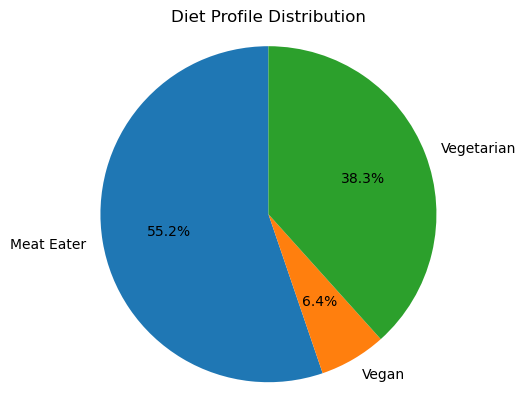

In [58]:
# Create the pie chart
diet_profile_pie_chart, ax = plt.subplots()
ax.pie(diet_profile_count, labels = diet_profile_count.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Diet Profile Distribution')
ax.axis('equal') 
plt.show()

##### Export

In [59]:
# Export Image of Pie Chart of diet_profile
diet_profile_pie_chart.savefig(os.path.join(path, '04_Analysis','Visualizations', 'diet_profile_pie_chart.png'))

### Time Pattern Profile

In [60]:
# Creating a column of the time pattern profile for late night weekend shoppers
df.loc[(df['order_hour_of_day'] >= 20) & (df['orders_day_of_week'].isin([0, 1])), 'time_profile'] = 'Late Night Weekend Shopper'

In [61]:
# Creating a column of the time pattern profile for late night shoppers
df.loc[(df['order_hour_of_day'] >= 20) & (~df['orders_day_of_week'].isin([0, 1])), 'time_profile'] = 'Late Night Shopper'

In [62]:
# Creating a column of the time pattern profile for weekend shoppers
df.loc[(df['order_hour_of_day'] < 20) & (df['orders_day_of_week'].isin([ 0, 1])), 'time_profile'] = 'Weekend Shopper'

In [63]:
# Creating a column of the time pattern profile for weekday shoppers
df.loc[(df['order_hour_of_day'] < 20) & (~df['orders_day_of_week'].isin([ 0, 1])), 'time_profile'] = 'Weekday Shopper'

In [64]:
# Check columns by order id with no repeats
df.groupby('order_id').first().reset_index().head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,full_name,region,customer_activity,age_group_profile,age_dependant_profile,dependant_group,income_profile,diet_profile,time_profile
0,2,202279,3,5,9,8.0,33120,1,1,Organic Egg Whites,...,98119,Paul Coleman,West,HIGH,Adult,Parent,With Dependents,Regular Income,Vegetarian,Weekday Shopper
1,3,205970,16,5,17,12.0,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,...,149831,David Magana,West,HIGH,Adult,Parent,With Dependents,High Income,Meat Eater,Weekday Shopper
2,4,178520,36,1,9,7.0,46842,1,0,Plain Pre-Sliced Bagels,...,76976,Philip Vargas,Northeast,HIGH,Senior,Caregiver,With Dependents,Regular Income,Vegetarian,Weekend Shopper
3,5,156122,42,6,16,9.0,13176,1,1,Bag of Organic Bananas,...,80419,Justin Singleton,South,HIGH,Adult,Parent,With Dependents,Regular Income,Meat Eater,Weekday Shopper
4,6,22352,4,1,12,30.0,40462,1,0,Cleanse,...,88210,Shawn Chung,Midwest,HIGH,Adult,Parent,With Dependents,Regular Income,Meat Eater,Weekend Shopper


In [65]:
# Total Orders by time profile counts per user id
df.pivot_table(
    values='order_id',
    index='user_id',
    columns='time_profile',
    aggfunc='count',
    fill_value = 0)


time_profile,Late Night Shopper,Late Night Weekend Shopper,Weekday Shopper,Weekend Shopper
user_id,,,,
1,0,0,42,17
2,0,0,131,64
3,0,0,26,62
4,0,0,18,0
5,0,0,16,21
...,...,...,...,...
206205,0,0,32,0
206206,8,9,155,113
206207,25,5,127,66


#### Time Pattern Visualizations

##### Heatmap + Export

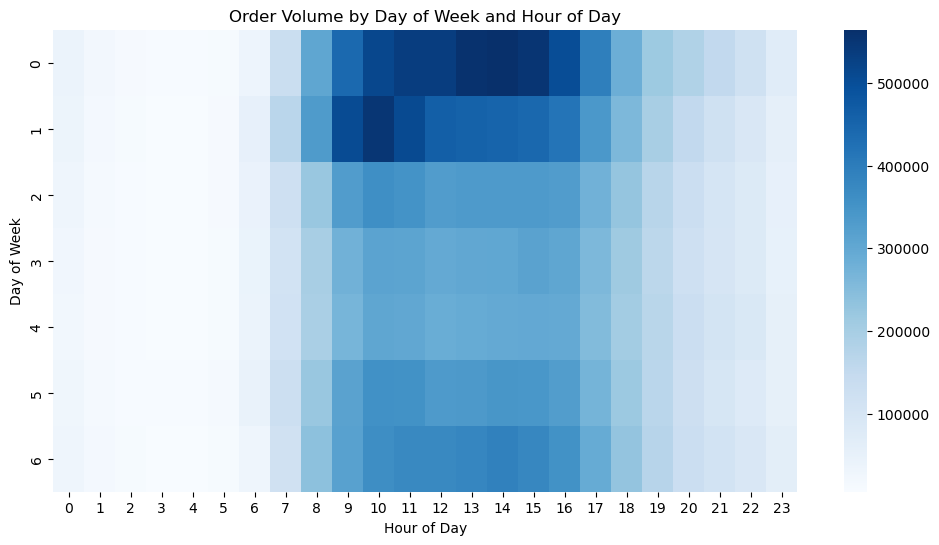

In [66]:
# Aggregate order counts by weekday and hour for heatmap
heatmap_data = df.pivot_table(index='orders_day_of_week', columns='order_hour_of_day', values='order_id', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Order Volume by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Export Heatmap
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'order_volume_heatmap.png'), dpi=300, bbox_inches='tight')
plt.show()


##### Bar Chart + Export

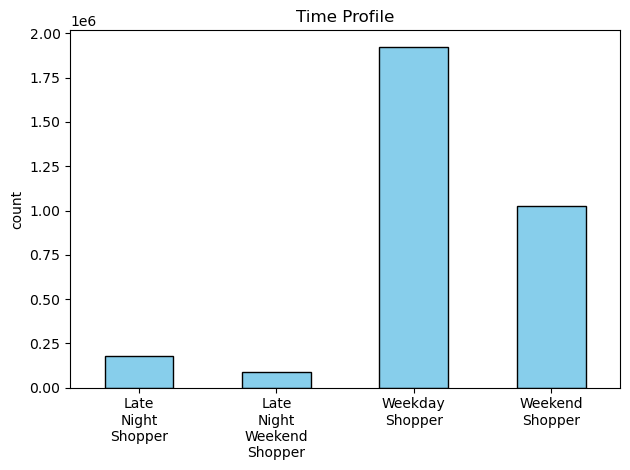

In [67]:
# Create Bar Chart based on the distribution of orders across time profile
time_profile_bar_chart = df.groupby('time_profile')['order_id'].nunique().plot.bar(color='skyblue', edgecolor='black')
plt.title('Time Profile')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

# Add line breaks to x-axis labels
new_labels = [label.get_text().replace(' ', '\n') for label in time_profile_bar_chart.get_xticklabels()] #List of strings
time_profile_bar_chart.set_xticklabels(new_labels) # Set string as new tick labels

plt.tight_layout()

# Export Bar Chart
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'orders_by_time_profile_bar_chart.png'), dpi=300, bbox_inches='tight')
plt.show()


#  08. Customer Profile Aggregation

In [68]:
# Check Columns to aggregate
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'daily_frequency',
       'new_daily_frequency', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_item', 'spnd_itm_price_flag',
       'total_order_spend', 'order_spend_flag', 'customer_freq',
       'customer_freq_flag', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', 'full_name', 'region', 'customer_activity',
       'age_group_profile', 'age_dependant_profile', 'dependant_group',
       'income_profile', 'diet_profile', 'time_profile'],
      dtype='object')

In [69]:
# Aggregate customer Frequency by income profile
df.groupby('income_profile')['customer_freq'].agg(['max', 'mean', 'min'])

,max,mean,min
income_profile,,,
High Income,30.0,10.283592,0.0
Low Income,30.0,11.123182,0.0
Regular Income,30.0,10.319037,0.0


Regardless of the income it seems like people shop at instacart at about the same rate. The low income does have a slight higher frequency.

In [70]:
# Aggregate total amount spent per order by income profile
df.groupby('income_profile')['total_order_spend'].agg(['max', 'mean', 'min'])

,max,mean,min
income_profile,,,
High Income,1047.4,126.122653,1.0
Low Income,875.0,92.617933,1.0
Regular Income,1092.2,125.596006,1.0


This aggregation shows us that both the Regular income and high income spend around the same when they shop at instacart but the lower income tends to spend slightly less.

In [71]:
# Aggregate customer Frequency by age group profile
df.groupby('age_group_profile')['customer_freq'].agg(['max', 'mean', 'min'])

,max,mean,min
age_group_profile,,,
Adult,30.0,10.416145,0.0
Senior,30.0,10.362496,0.0
Young Adult,30.0,10.382574,0.0


When viewed by age group it seems like all groups shop at instacart at around the same rate.

In [72]:
# Aggregate total amount spent per order by age group profile
df.groupby('age_group_profile')['total_order_spend'].agg(['max', 'mean', 'min'])

,max,mean,min
age_group_profile,,,
Adult,1092.2,122.375664,1.0
Senior,787.0,121.398491,1.0
Young Adult,842.1,122.189941,1.0


Unlike when we grouped by income, it seems that when we group by age group the average amount spent on orders is about the same. We do see a difference in the max spent on the adult profile.

# 09. Comparing Customer Profile with Regions and Departments

#### Comparing Customer Profile with Region

In [73]:
# Proportion of income profiles within each region
pd.crosstab(df['region'], df['income_profile'], normalize='index').round(3)*100

income_profile,High Income,Low Income,Regular Income
region,,,
Midwest,30.0,11.0,59.0
Northeast,29.7,11.0,59.3
South,29.1,11.3,59.5
West,29.4,11.0,59.7


In [74]:
# Proportion of age group profiles within each region
pd.crosstab(df['region'], df['age_group_profile'], normalize='index').round(3)*100

age_group_profile,Adult,Senior,Young Adult
region,,,
Midwest,61.4,26.2,12.4
Northeast,60.4,27.2,12.4
South,61.0,26.3,12.8
West,61.3,26.5,12.3


In [75]:
# Proportion of time profiles withing each region
pd.crosstab(df['region'], df['time_profile'], normalize='index').mul(100).round(1)

time_profile,Late Night Shopper,Late Night Weekend Shopper,Weekday Shopper,Weekend Shopper
region,,,,
Midwest,5.8,2.9,57.6,33.7
Northeast,5.8,3.0,57.6,33.7
South,5.7,2.9,57.7,33.6
West,5.7,2.9,57.7,33.8


#### Comparing Customer Profile with Departments

In [76]:
df_dept = pd.read_csv(os.path.join(path, '02_Data', 'Prepared Data', 'departments_wrangled_task.csv'))

In [77]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [78]:
# Columns you want to keep
cols = ['department_id', 'region', 'age_dependant_profile', 'income_profile', 
        'user_id', 'order_id', 'order_number', 'total_order_spend', 'customer_activity', 'age_group_profile', 'income']

df2 = df[cols].copy()

# Convert numeric columns to smaller dtypes
df2['department_id'] = df2['department_id'].astype('int32')
df2['user_id'] = df2['user_id'].astype('int32')
df2['order_id'] = df2['order_id'].astype('int32')
df2['order_number'] = df2['order_number'].astype('int16')

# Convert categorical columns to save memory
cat_cols = ['region', 'age_dependant_profile', 'income_profile', 'customer_activity']
for col in cat_cols:
    df2[col] = df2[col].astype('category')

# Prepare reduced department dataframe
df_dept_reduced = df_dept[['department_id', 'department']].copy()
df_dept_reduced['department_id'] = df_dept_reduced['department_id'].astype('int32')
df_dept_reduced['department'] = df_dept_reduced['department'].astype('category')

# Chunked merge
chunk_size = 1_000_000
chunks = []

for start in range(0, len(df2), chunk_size):
    chunk = df2.iloc[start:start+chunk_size]
    merged_chunk = chunk.merge(df_dept_reduced, on='department_id', how='left')
    chunks.append(merged_chunk)

df_merged = pd.concat(chunks, ignore_index=True)

Used chat gpt to create this code to merge my two df because i was getting a constant error on how much ram was being used.

In [79]:
# Proportion of Region and Department
pd.crosstab(df_merged['department'], df_merged['region'], normalize='index').mul(100).round(1)

region,Midwest,Northeast,South,West
department,,,,
alcohol,24.1,17.7,32.0,26.2
babies,23.8,18.0,32.7,25.5
bakery,23.8,18.2,31.8,26.2
beverages,23.7,18.3,32.2,25.8
breakfast,23.7,17.9,32.0,26.4
bulk,24.2,17.1,32.0,26.7
canned goods,23.9,17.8,32.1,26.2
dairy eggs,23.9,18.0,32.0,26.1
deli,23.8,18.1,32.0,26.1


In [80]:
# Flip crossstab for bar chart
reg_dept_dist = pd.crosstab(df_merged['region'], df_merged['department'], normalize='index').mul(100).round(1)

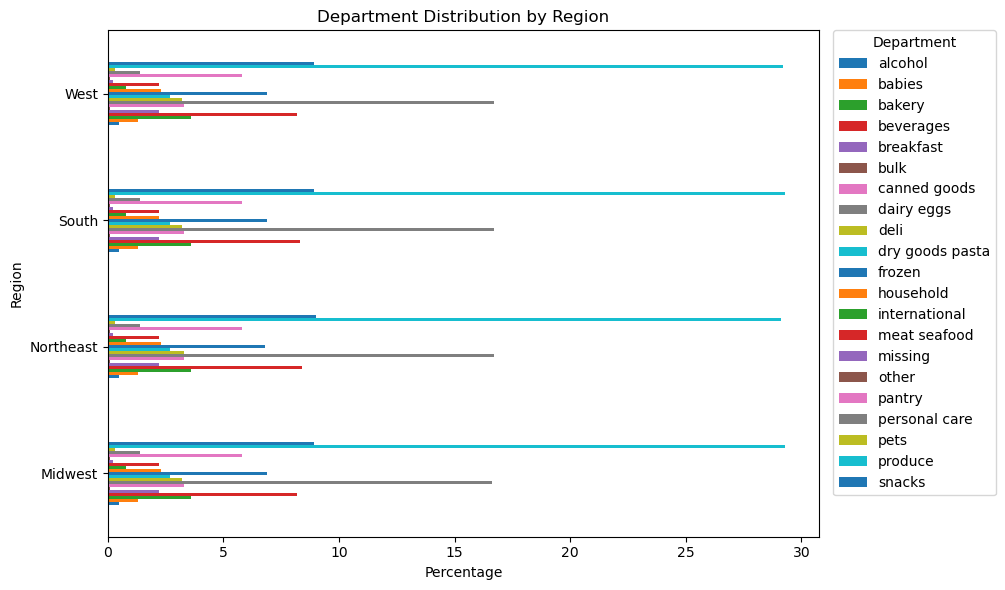

In [81]:
# Plot as grouped bar chart
reg_dept_dist_bar_chart = reg_dept_dist.plot(kind='barh', figsize=(12, 6))

plt.title('Department Distribution by Region')
plt.xlabel('Percentage')
plt.ylabel('Region')

# Move legend to the side (right of plot)
plt.legend(title='Department', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on the right for the legend

plt.show()


In [82]:
# Proportion of age group profile by department
pd.crosstab(df_merged['age_group_profile'], df_merged['department'], normalize='index').mul(100).round(1)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group_profile,,,,,,,,,,,,,,,,,,,,,
Adult,0.5,1.3,3.6,8.3,2.2,0.1,3.3,16.7,3.3,2.7,...,2.3,0.8,2.2,0.2,0.1,5.8,1.4,0.3,29.3,8.9
Senior,0.5,1.3,3.6,8.3,2.1,0.1,3.3,16.6,3.2,2.7,...,2.3,0.8,2.2,0.2,0.1,5.8,1.4,0.3,29.3,8.9
Young Adult,0.5,1.3,3.6,8.2,2.2,0.1,3.3,16.7,3.2,2.7,...,2.3,0.8,2.2,0.2,0.1,5.8,1.4,0.3,29.1,8.9


In [83]:
# Distribution of Department by age group
age_grp_dept_dist = pd.crosstab(df_merged['age_group_profile'], df_merged['department'], normalize='index').mul(100).round(1)

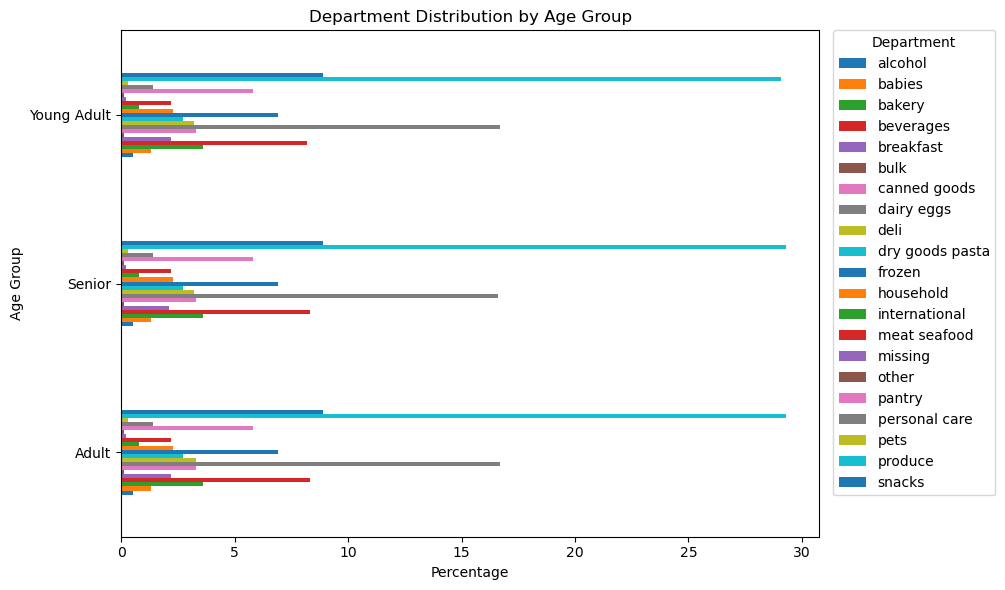

In [84]:
# Plot as grouped bar chart
age_grp_dept_dist_bar_chart = age_grp_dept_dist.plot(kind='barh', figsize=(12, 6))
plt.title('Department Distribution by Age Group')
plt.xlabel('Percentage')
plt.ylabel('Age Group')

# Move legend to the side (right of plot)
plt.legend(title='Department', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on the right for the legend

plt.show()


In [85]:
# Proportion of age group profile by department
pd.crosstab(df_merged['department'], df_merged['income_profile'], normalize='index').mul(100).round(1)

income_profile,High Income,Low Income,Regular Income
department,,,
alcohol,31.8,12.9,55.3
babies,30.8,7.3,62.0
bakery,30.4,9.8,59.8
beverages,28.3,15.1,56.6
breakfast,28.5,13.8,57.6
bulk,26.6,14.1,59.3
canned goods,30.9,8.1,61.0
dairy eggs,29.9,9.9,60.1
deli,29.5,10.9,59.6


In [86]:
# Income profile distribution within each department
income_dept_dist = pd.crosstab(df_merged['income_profile'], df_merged['department'], normalize='index').mul(100).round(1)

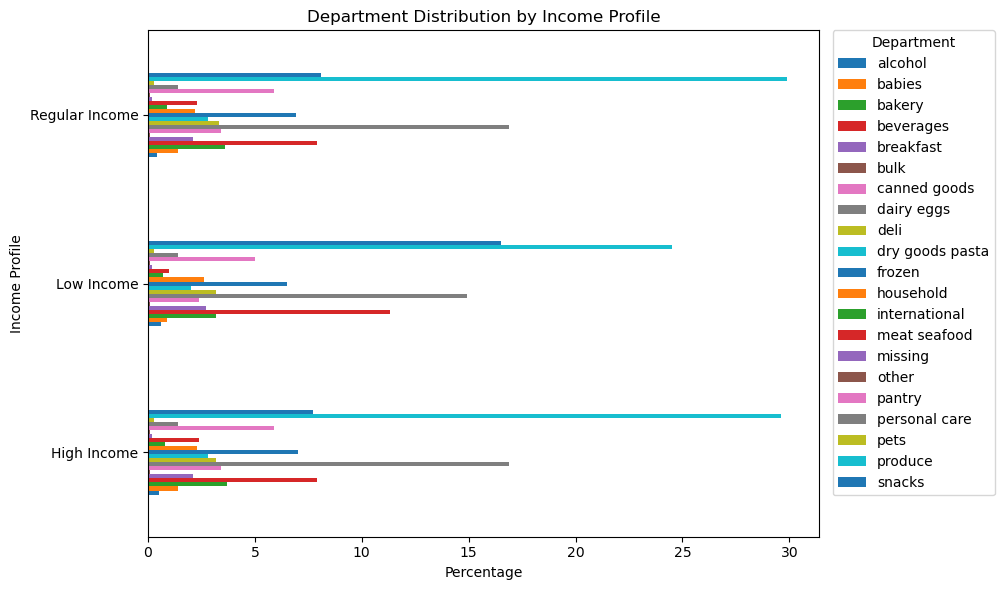

In [87]:
# Plot as grouped bar chart
income_dept_dist_bar_chart = income_dept_dist.plot(kind='barh', figsize=(12, 6))
plt.title('Department Distribution by Income Profile')
plt.xlabel('Percentage')
plt.ylabel('Income Profile')

# Move legend to the side (right of plot)
plt.legend(title='Department', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on the right for the legend

plt.show()


As expected the lower income bracket spends the least on all departments and the regular income bracket spends the most. This is so because there are more people in the regular income bracket which increases their percentage per department.

##### Export

In [88]:
reg_dept_dist_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'reg_dept_dist_bar_chart.png'))

In [89]:
age_grp_dept_dist_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_grp_dept_dist_bar_chart.png'))

In [90]:
income_dept_dist_bar_chart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'income_dept_dist_bar_chart.png'))

#  10. Export

In [91]:
df.to_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'instacart_final_df_1.pkl'))

In [92]:
df2.to_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'instacart_final_df_2.pkl'))